pipeline, 가변 길이의 다차원 시계열 데이터에 대한 plot과 miniROCKET

In [2]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sktime.datasets import (
    load_arrow_head,        # univariate dataset
    load_basic_motions,     # multivariate dataset
    load_japanese_vowels,   # multivariate dataset with unequal length
)
from sktime.transformations.panel.rocket import (
    MiniRocket,
    MiniRocketMultivariate,
    MiniRocketMultivariateVariable,
)

In [3]:
X_train_jv, y_train_jv = load_japanese_vowels(split="train", return_X_y=True)
# lets visualize the first three voice recordings with dimension 0-11

print("number of samples training: ", X_train_jv.shape[0])
print("series length of recoding 0, dimension 5: ", X_train_jv.iloc[0, 5].shape)
print("series length of recoding 1, dimension 5: ", X_train_jv.iloc[1, 0].shape)

X_train_jv.head(3)

number of samples training:  270
series length of recoding 0, dimension 5:  (20,)
series length of recoding 1, dimension 5:  (26,)


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11
0,0 1.860936 1 1.891651 2 1.939205 3...,0 -0.207383 1 -0.193249 2 -0.239664 3...,0 0.261557 1 0.235363 2 0.258561 3...,0 -0.214562 1 -0.249118 2 -0.291458 3...,0 -0.171253 1 -0.112890 2 -0.041053 3...,0 -0.118167 1 -0.112238 2 -0.102034 3...,0 -0.277557 1 -0.311997 2 -0.383300 3...,0 0.025668 1 -0.027122 2 0.019013 3...,0 0.126701 1 0.171457 2 0.169510 3...,0 -0.306756 1 -0.289431 2 -0.314894 3...,0 -0.213076 1 -0.247722 2 -0.227908 3...,0 0.088728 1 0.093011 2 0.074638 3...
1,0 1.303905 1 1.288280 2 1.332021 3...,0 0.067256 1 0.018672 2 -0.058744 3...,0 0.597720 1 0.631579 2 0.601928 3...,0 -0.271474 1 -0.355112 2 -0.347913 3...,0 -0.236808 1 -0.119216 2 -0.053463 3...,0 -0.411125 1 -0.434425 2 -0.421753 3...,0 -0.014826 1 -0.078036 2 -0.028479 3...,0 0.113175 1 0.178121 2 0.145073 3...,0 -0.058230 1 -0.106430 2 -0.159488 3...,0 -0.173138 1 -0.181910 2 -0.127751 3...,0 0.093058 1 0.093031 2 0.019092 3...,0 0.099247 1 0.099183 2 0.113546 3...
2,0 1.462484 1 1.309815 2 1.418207 3...,0 0.174066 1 0.120183 2 0.015721 3...,0 0.505133 1 0.503046 2 0.589994 3...,0 -0.374302 1 -0.327562 2 -0.310586 3...,0 -0.362125 1 -0.356789 2 -0.477019 3...,0 -0.400335 1 -0.445498 2 -0.367101 3...,0 -0.137429 1 -0.060423 2 -0.120849 3...,0 -0.000830 1 -0.007899 2 0.066952 3...,0 0.053888 1 0.041605 2 -0.023859 3...,0 -0.237630 1 -0.231087 2 -0.224317 3...,0 0.120636 1 0.121053 2 0.175298 3...,0 0.193254 1 0.202386 2 0.156670 3...


Speaker ID:  6


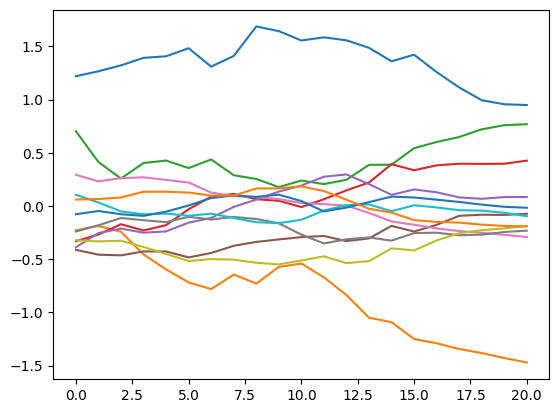

In [4]:
# additional visualizations
number_example = 153
for i in range(12):
    X_train_jv.loc[number_example, f"dim_{i}"].plot()
print("Speaker ID: ", y_train_jv[number_example])

In [5]:
minirocket_mv_var_pipeline = make_pipeline(
    MiniRocketMultivariateVariable(
        pad_value_short_series=-10.0, random_state=42, max_dilations_per_kernel=16
    ),
    StandardScaler(with_mean=False),
    RidgeClassifierCV(alphas=np.logspace(-3, 3, 10)),
)
print(minirocket_mv_var_pipeline)

minirocket_mv_var_pipeline.fit(X_train_jv, y_train_jv)

Pipeline(steps=[('minirocketmultivariatevariable',
                 MiniRocketMultivariateVariable(max_dilations_per_kernel=16,
                               pad_value_short_series=-10.0, random_state=42)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])))])


,steps,"[('minirocketmultivariatevariable', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,False
,with_std,True
,alphas,array([1.0000...00000000e+03])
,fit_intercept,True
,scoring,None
,cv,None


In [7]:
X_test_jv, y_test_jv = load_japanese_vowels(split="test", return_X_y=True)

minirocket_mv_var_pipeline.score(X_test_jv, y_test_jv)
from sklearn.metrics import classification_report
y_pred = minirocket_mv_var_pipeline.predict(X_test_jv)
print(classification_report(y_test_jv, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        88
           4       1.00      0.98      0.99        44
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        50
           9       0.97      1.00      0.98        29

    accuracy                           0.99       370
   macro avg       0.99      0.99      0.99       370
weighted avg       0.99      0.99      0.99       370

